# BIKE SHARING LINEAR REGRESSION

Data understanding, preparation and EDA

In [1]:
#import required lib and warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [4]:
df.shape

(730, 16)

In [5]:
#statistical info
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.value_counts().sum()

730

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
df.mean()

instant        365.500000
season           2.498630
yr               0.500000
mnth             6.526027
holiday          0.028767
weekday          2.995890
workingday       0.690411
weathersit       1.394521
temp            20.319259
atemp           23.726322
hum             62.765175
windspeed       12.763620
casual         849.249315
registered    3658.757534
cnt           4508.006849
dtype: float64

In [10]:
df.rename(columns = {
    'yr' : 'Year',
    'mnth' : 'Month',
    'dteday' : 'Date',
    'hum' : 'Humidity',
    'cnt' : 'Count'},
         inplace = True)

In [11]:
df.head()

,instant,Date,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#copy the dataset inanother df
copy = df.copy()

In [13]:
copy.shape

(730, 16)

In [14]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   Date        730 non-null    object 
 2   season      730 non-null    int64  
 3   Year        730 non-null    int64  
 4   Month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  Humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  Count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [15]:

# drop the duplicates 
copy.drop_duplicates(inplace = True)

In [16]:
copy.shape

(730, 16)

We can see that, shape doesnt changed so that, There is no duplicate in the dataset.

In [17]:
#unique values
df.apply(lambda x:len(x.unique()))

instant       730
Date          730
season          4
Year            2
Month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
Humidity      594
windspeed     649
casual        605
registered    678
Count         695
dtype: int64

Remove unwanted columns
1. instant : record index as this implies only indexes
2. Date : It can be compensated by year and month column
3. casual and registered : count shows total rental bikes including both casual and registered so removing casual and registered.

In [18]:
# unwanted column removal
df.drop(['instant','Date','casual','registered'], axis =1, inplace =True)

In [19]:
df.shape

(730, 12)

In [20]:
# Mapping Season column
df.season = df.season.map({1:'spring',
                          2:'summer',
                          3: 'fall',
                          4: 'winter'})

In [21]:
df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# Mapping Month column
df.Month = df.Month.map({1: 'Jan',
                        2: 'Feb',
                        3: 'Mar',4:'Apr', 5: 'May', 6: 'June', 7: 'July', 8 : 'Aug', 9: 'Sep', 10 : 'Oct', 11: 'Nov', 12:'Dec'})

# Mapping weekday column
df.weekday = df.weekday.map({0:'Sun', 1 : 'Mon',2:'Tues', 3: 'Wed', 4: 'Thurs', 5 :'Fri', 6: 'Sat'})

# Mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [23]:
df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [25]:
df.columns

Index(['season', 'Year', 'Month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'Humidity', 'windspeed', 'Count'],
      dtype='object')

# Data Visualization and EDA

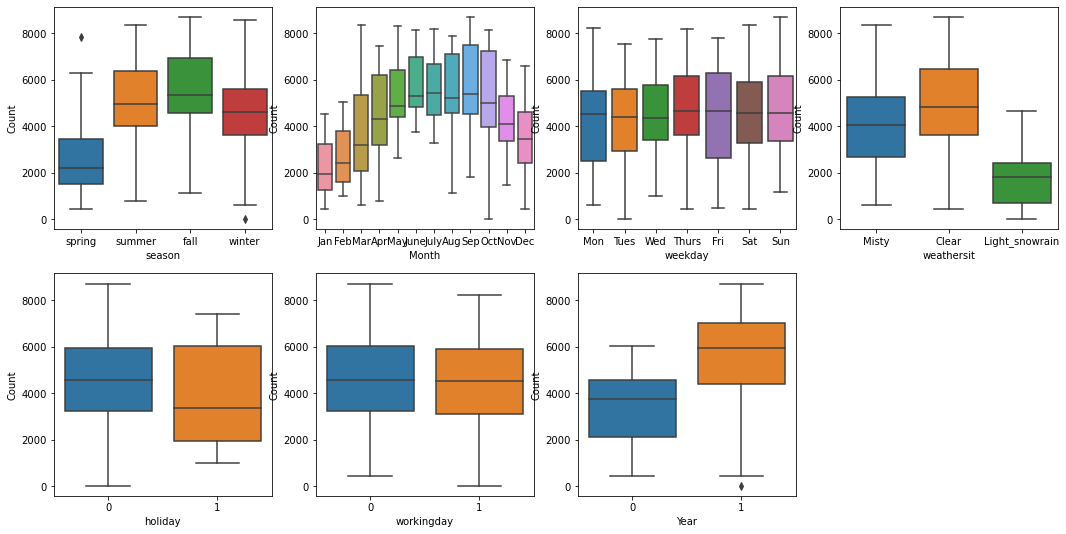

In [26]:
plt.figure(figsize=(18, 9))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'Count', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'Month', y = 'Count', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'Count', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'Count', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'Count', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'Count', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'Year', y = 'Count', data = df)
plt.show()

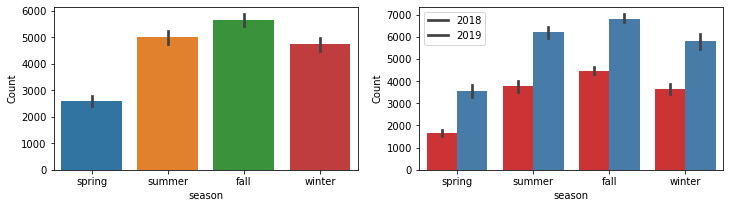

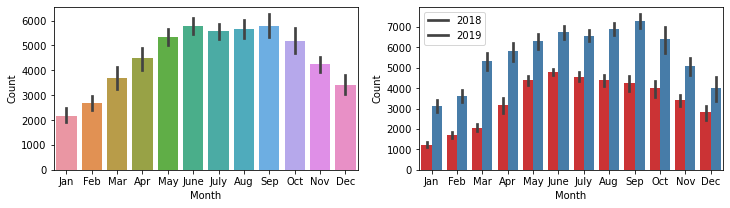

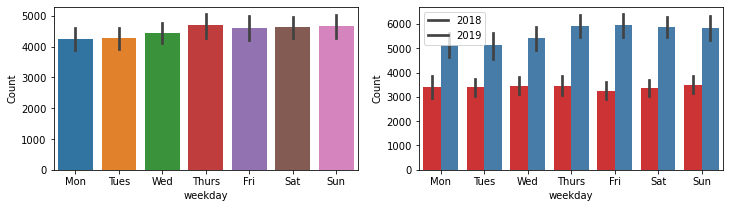

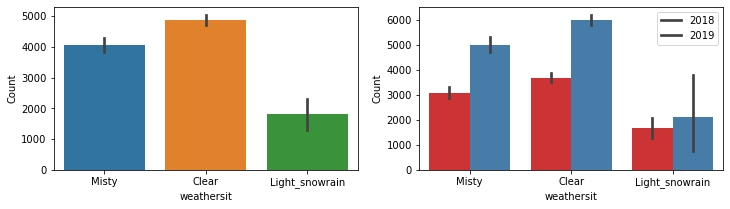

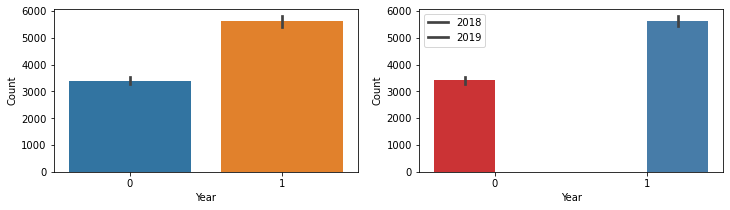

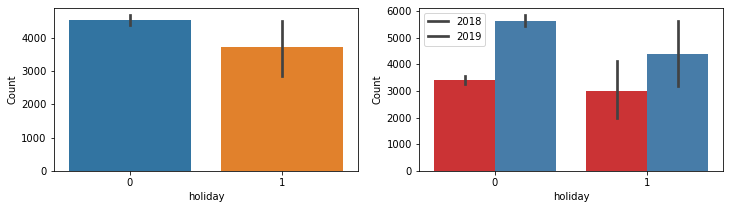

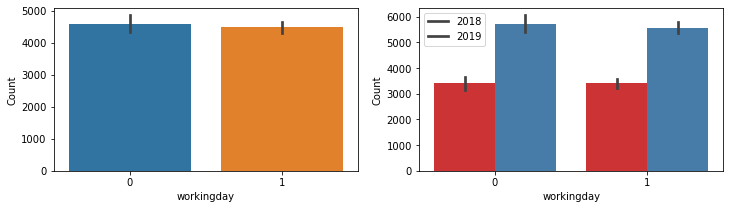

In [27]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,3))
    plt.subplot(1,2,1)
    sns.barplot(column,'Count', data = df)
    plt.subplot(1,2,2)
    sns.barplot(column,'Count', data = df, hue = 'Year',palette='Set1')
    plt.legend(labels =['2018','2019'])
    plt.show()
    
    
plot_cat_columns('season')
plot_cat_columns('Month')
plot_cat_columns('weekday')
plot_cat_columns('weathersit')
plot_cat_columns('Year')
plot_cat_columns('holiday')
plot_cat_columns('workingday')

INSIGHTS
1. Fall season gained more bookings compared to other 3 seasons while spring has minimum bookings observed in noth years 2018 and 2019.
2. As we can see that, no of bookings are increased from start of the year(Jan) while, no has been decreased towards the end of the year. Most of the booking has made on may, jun, July, Aug, sep and oct. 2019 has more booking as compare to the year 2018.
3. As it is shown in barchart, almost all weekdays has booking,as no major differences has shown on weekdays. 2018 has more bookings than 2019.
4. Major bookings has made in clear weathersit while minimum bookings has observed in Light_snowrain.
5. Year 2019 has more bookings as compared to year 2018.
6. When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.
7. Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


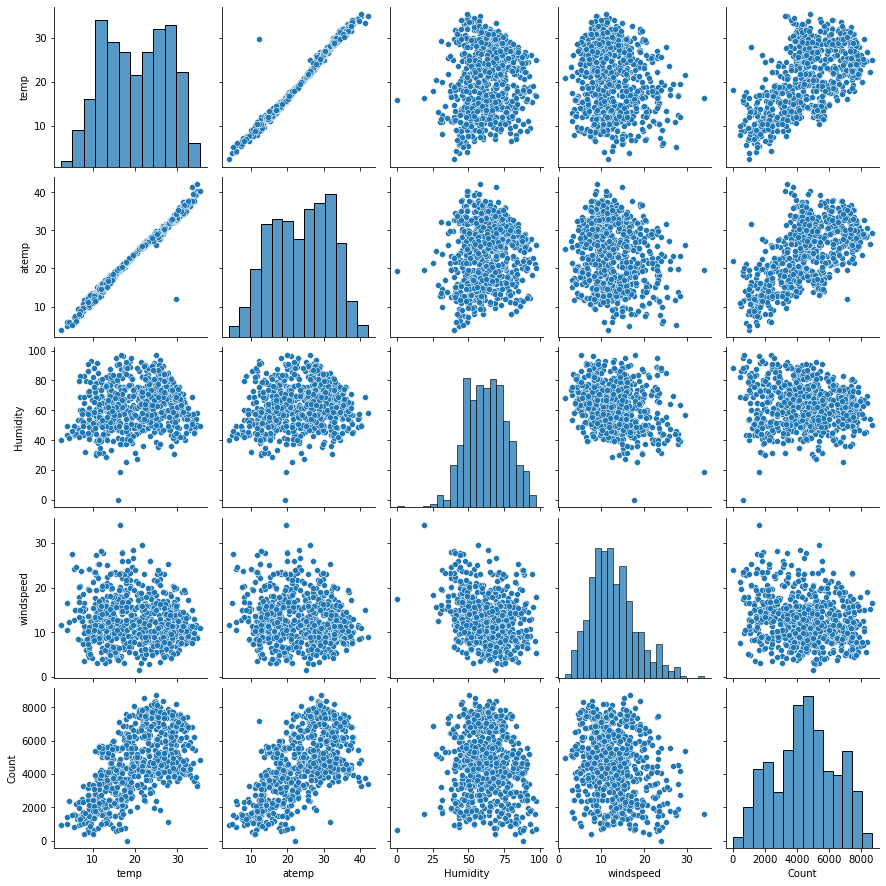

In [29]:
# visualizing the numerical columns
sns.pairplot(data =df, vars = ['temp','atemp','Humidity','windspeed','Count'])
plt.show()

INSIGHT: - The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp','Humidity', 'windspeed' and 'Count'

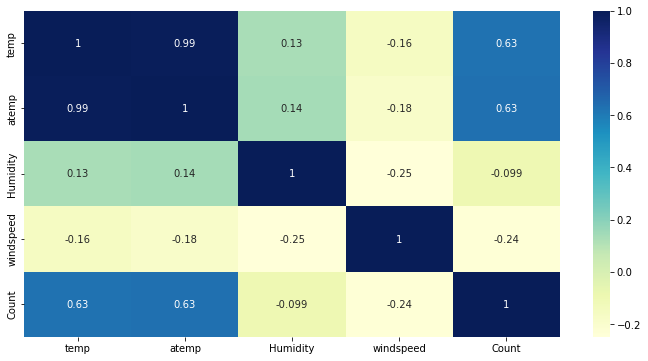

In [30]:
# Correlation between numerical Variables
plt.figure(figsize = (12,6))
matrix = np.triu(df[['temp','atemp','Humidity','windspeed','Count']].corr())
sns.heatmap(df[['temp','atemp','Humidity','windspeed','Count']].corr(),annot=True,cmap ='YlGnBu')
plt.show()

There is strong linear relationship between varibale atemp and temp however, Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Data Preparation

In [31]:
# Creation of dummy variables
# We have to create dummy varaibles for month, weekday, season and weathersit

Months_df =pd.get_dummies(df.Month,drop_first=True)

In [32]:

Weekdays_df = pd.get_dummies(df.weekday, drop_first = True)
Weathersit_df = pd.get_dummies(df.weathersit, drop_first = True)
season_df = pd.get_dummies(df['season'],drop_first = True)

In [33]:
df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
# Merging  the dataframe, with the dummy variable dataset. 

df_dummy = pd.concat([df,season_df,Weekdays_df,Weathersit_df,Months_df],axis=1)

In [35]:
df_dummy.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tues,1,Misty,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [36]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   Year            730 non-null    int64  
 2   Month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   Humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  Count           730 non-null    int64  
 12  spring          730 non-null    uint8  
 13  summer          730 non-null    uint8  
 14  winter          730 non-null    uint8  
 15  Mon             730 non-null    uint8  
 16  Sat             730 non-null    uint8  
 17  Sun             730 non-null    uin

In [37]:
#dropping unnecessary variables as wehave created dummy var of it

df_dummy.drop(['season','Month','weekday','weathersit'],axis =1, inplace = True) 

In [38]:
df_dummy.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
df_dummy.shape

(730, 30)

In [40]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   Humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   Count           730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  Mon             730 non-null    uint8  
 12  Sat             730 non-null    uint8  
 13  Sun             730 non-null    uint8  
 14  Thurs           730 non-null    uint8  
 15  Tues            730 non-null    uint8  
 16  Wed             730 non-null    uint8  
 17  Light_snowrain  730 non-null    uin

# Data Splitting

In [41]:
# we have to split data into test and train dataset
np.random.seed(0)
df_train, df_test = train_test_split(df_dummy, train_size = 0.7, random_state = 100)

In [42]:
df_train.shape # check the shape of training datatset

(510, 30)

In [43]:
df_test.shape # check the shape of testing datatset

(220, 30)

In [44]:
scaler = MinMaxScaler()  # Using MinMaxScaler to Rescaling the features

In [45]:
df_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,1,0,0,0,0,0


In [47]:
df_train.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','Humidity','windspeed','Count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [49]:
# verifying the head after appying scaling.

df_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# describing the dataset

df_train.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


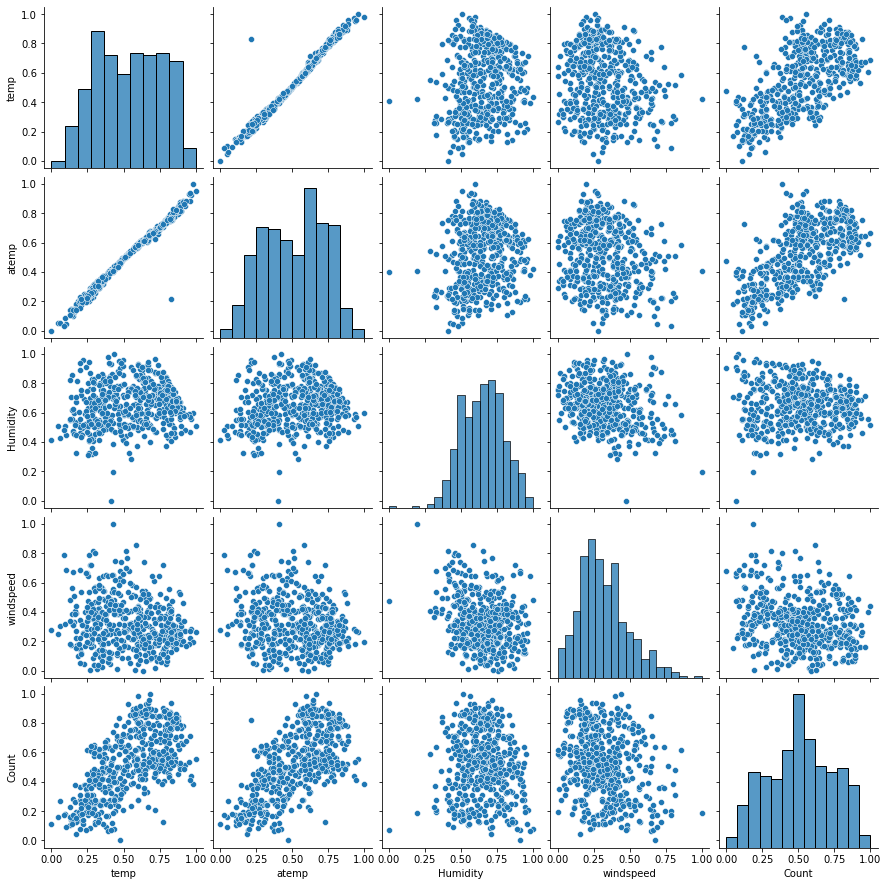

In [51]:
# check the correlation coefficient to check whether which var is highly corelated
sns.pairplot(data =df_train, vars = ['temp','atemp','Humidity','windspeed','Count'])
plt.show()

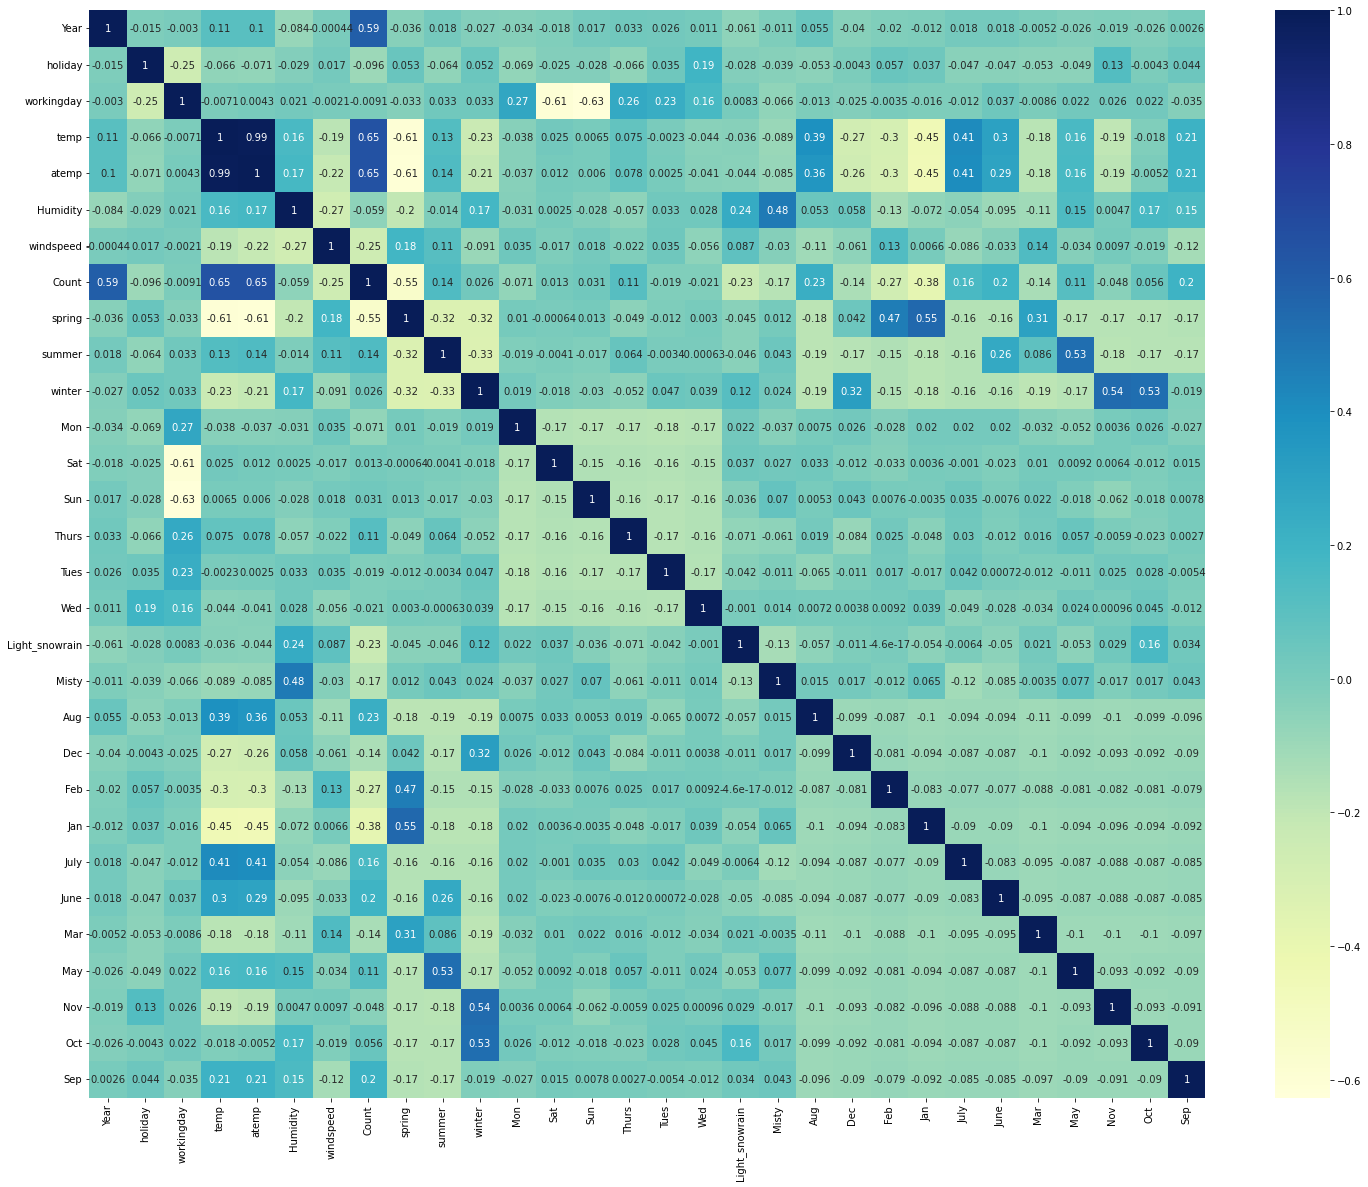

In [52]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu' )
plt.show()

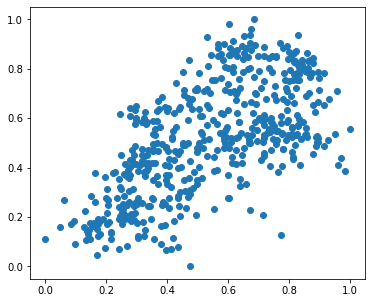

In [53]:
# Visualizing one of the correlation to see the trends via Scatter plot.
plt.figure(figsize = [6,5])
plt.scatter(df_train.temp,df_train.Count)
plt.show()

# Building the Linear Model


In [54]:
y_train = df_train.pop('Count')
x_train = df_train

In [55]:
#Recursive Feature elimination
lm = LinearRegression()
lm.fit(x_train,y_train)

# Use RFE to eliminate some columns
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(x_train,y_train)

In [56]:
#List of variables selected in top 15 list (Columns selected by RFE and their weights)
list(zip(x_train.columns, rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thurs', False, 14),
 ('Tues', False, 7),
 ('Wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1)]

In [57]:
x_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#print features selected by RFE
col = x_train.columns[rfe.support_]
print(col)

Index(['Year', 'holiday', 'temp', 'Humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Light_snowrain', 'Misty', 'Dec', 'Jan', 'July', 'Nov',
       'Sep'],
      dtype='object')


In [59]:
# Print features NOT selected by rfe
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed',
       'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct'],
      dtype='object')

In [60]:
# Calculate VIF variable and print it
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [61]:
# dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [62]:
calculateVIF(x_train_rfe)

,Features,VIF
3,Humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
9,Misty,2.32
0,Year,2.09
13,Nov,1.85
11,Jan,1.75


As it shoes, humidity has highest VIF.

# Building Linear Model

In [63]:
# Build 1 st linear model

x_train_LM1 = sm.add_constant(x_train_rfe)
LR1 = sm.OLS(y_train,x_train_LM1).fit()
print(LR1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.15e-189
Time:                        21:37:29   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [64]:
# As humidity shows high VIF values hence we can drop it
x_train_LM1_New = x_train_rfe.drop(['Humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_LM1_New)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,Year,2.07
12,Nov,1.81
10,Jan,1.66
11,July,1.59
8,Misty,1.57


In [65]:
# Building 2nd linear regression model

x_train_LM2 = sm.add_constant(x_train_LM1_New)
LR2 = sm.OLS(y_train,x_train_LM2).fit()
print(LR2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          4.75e-186
Time:                        21:37:31   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

let us check for p value, we can drop Nov as it has high P-value

In [66]:
x_train_LM1_New = x_train_LM1_New.drop(['Nov'], axis = 1)

In [67]:
# Run the function to calculate VIF for the new model
calculateVIF(x_train_LM1_New)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,Year,2.07
6,winter,2.05
10,Jan,1.65
11,July,1.59
8,Misty,1.57
12,Sep,1.34


In [68]:
# Building 3rd linear regression model

x_train_LM3 = sm.add_constant(x_train_LM1_New)
LR3 = sm.OLS(y_train,x_train_LM3).fit()
print(LR3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          2.74e-186
Time:                        21:37:44   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

In [69]:
# We can drop dec variable as it has high p-value
x_train_LM1_New = x_train_LM1_New.drop(['Dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_LM1_New)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,Year,2.07
6,winter,1.78
9,Jan,1.61
10,July,1.59
8,Misty,1.56
11,Sep,1.34


In [70]:
# Building 4th linear regression model

x_train_LM4 = sm.add_constant(x_train_LM1_New)
LR4 = sm.OLS(y_train,x_train_LM4).fit()
print(LR4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.14e-187
Time:                        21:37:45   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [71]:
# We can drop Jan variable as it has high p-value
x_train_LM1_New = x_train_LM1_New.drop(['Jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_LM1_New)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,Year,2.07
6,winter,1.78
9,July,1.58
8,Misty,1.55
10,Sep,1.34
7,Light_snowrain,1.08


In [72]:
# Building 5th linear regression model

x_train_LM5 = sm.add_constant(x_train_LM1_New)
LR5 = sm.OLS(y_train,x_train_LM5).fit()
print(LR5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          5.06e-187
Time:                        21:37:47   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [73]:
# We can drop July variable as it has high p-value
x_train_LM1_New = x_train_LM1_New.drop(['July'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_LM1_New)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,Year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
8,Misty,1.55
9,Sep,1.23
7,Light_snowrain,1.08
1,holiday,1.04


In [74]:
# Building 6th linear regression model

x_train_LM6 = sm.add_constant(x_train_LM1_New)
LR6 = sm.OLS(y_train,x_train_LM6).fit()
print(LR6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.47e-186
Time:                        21:37:48   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

In [75]:
# We can drop spring variable as it has high p-value
x_train_LM1_New = x_train_LM1_New.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_LM1_New)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,Year,2.00
4,summer,1.57
7,Misty,1.48
5,winter,1.37
8,Sep,1.20
6,Light_snowrain,1.08
1,holiday,1.04


In [76]:
# Building 7th linear regression model

x_train_LM7 = sm.add_constant(x_train_LM1_New)
LR7 = sm.OLS(y_train,x_train_LM7).fit()
print(LR7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          2.83e-186
Time:                        21:37:49   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

In [77]:
calculateVIF(x_train_LM1_New)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,Year,2.00
4,summer,1.57
7,Misty,1.48
5,winter,1.37
8,Sep,1.20
6,Light_snowrain,1.08
1,holiday,1.04


Here VIF seems to be almost accepted. p-value for all the features is 0.0 and R2 is 0.830 Let us select model LR7 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [78]:
# Checking the parameters and their coefficient values
LR7.params

const             0.125926
Year              0.232861
holiday          -0.098685
temp              0.548008
windspeed        -0.153246
summer            0.088080
winter            0.129345
Light_snowrain   -0.282869
Misty            -0.078375
Sep               0.101195
dtype: float64

In [79]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    LR = LinearRegression()
    LR.fit(X,y)
    return LR

In [80]:
#Let us build the finalmodel using sklearn
cols = ['Year', 'windspeed','summer', 'Misty',
        'winter', 'Sep', 'Light_snowrain',
       'holiday', 'temp']

#Build a model with above columns
LR = build_model_sk(x_train_LM1_New[cols],y_train)
print(LR.intercept_,LR.coef_)

0.12592584330857537 [ 0.23286073 -0.15324618  0.08808036 -0.07837453  0.1293451   0.10119495
 -0.28286936 -0.09868539  0.54800759]


# Residual Analysis of the train data and validation


In [81]:
x_train_LM7

,const,Year,holiday,temp,windspeed,summer,winter,Light_snowrain,Misty,Sep
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,1,0
111,1.0,0,0,0.345824,0.380981,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0
79,1.0,0,0,0.462664,0.529881,1,0,0,1,0


In [82]:
y_train_pred = LR7.predict(x_train_LM7)

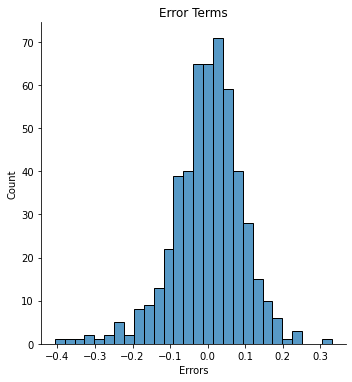

In [83]:
def plot_Res_Anlysis(act, pred):
    sns.displot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_Res_Anlysis(y_train,y_train_pred)    

Errors are normally distribured here with mean 0. So everything seems to be fine

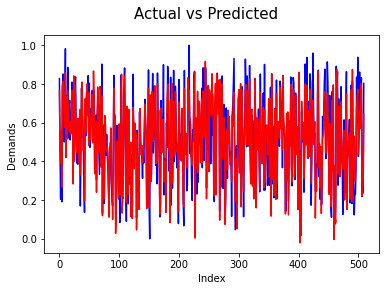

In [84]:
# Actual vs Predicted
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems OK.

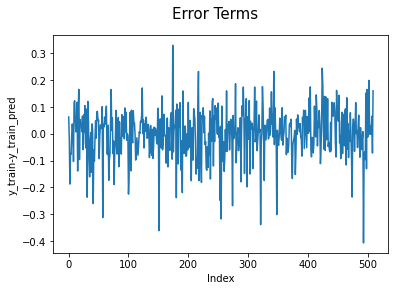

In [85]:
# Error Terms
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [86]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8303450237489229

Inference
R2 is almost same as we obtained for our final model

# Multi Colinearity

In [87]:
calculateVIF(x_train_LM1_New)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,Year,2.00
4,summer,1.57
7,Misty,1.48
5,winter,1.37
8,Sep,1.20
6,Light_snowrain,1.08
1,holiday,1.04


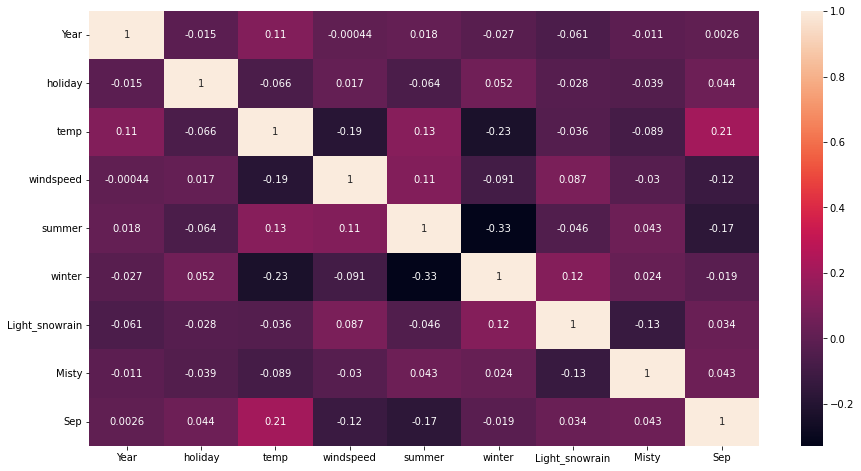

In [88]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train_LM1_New.corr(),annot = True,)
plt.show()

# Linearity

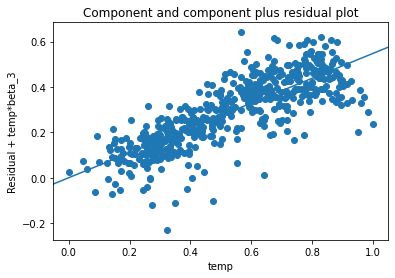

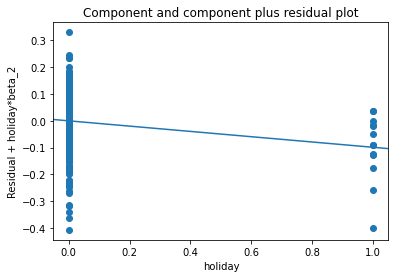

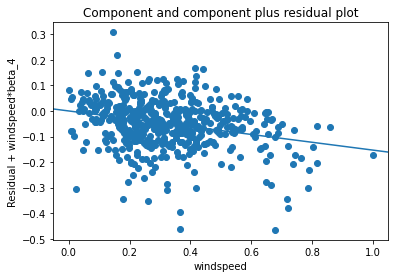

In [89]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(LR7, 'temp')
plt.show()

sm.graphics.plot_ccpr(LR7, 'holiday')
plt.show()

sm.graphics.plot_ccpr(LR7, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

# Homoscedasticity

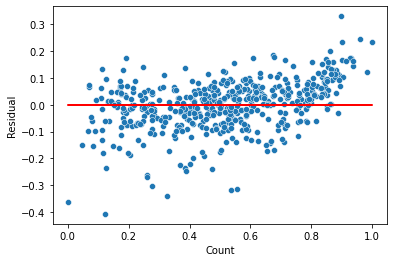

In [90]:
y_train_pred = LR7.predict(x_train_LM7)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

Independence of residuals
Durbin-Watson value of final model LR7 is 2.097, which signifies there is no autocorrelation.

# Making Predictions Using the Final Model
Predict values for test data set

In [92]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'Humidity', 'windspeed','Count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [93]:
#Columns from our final model
cols = ['Year', 'windspeed','summer', 'Misty',
        'winter', 'Sep', 'Light_snowrain',
       'holiday', 'temp']

#Predict the values for test data
y_test_pred = LR.predict(df_test[cols])

In [94]:
df_test.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
y_test = df_test.pop('Count')
X_test = df_test

In [96]:
col = x_train_LM1_New.columns

X_test = X_test[col]

# Adding constant variable to test dataframe
X_test_LM7 = sm.add_constant(X_test)

In [97]:
y_pred = LR7.predict(X_test_LM7)

In [98]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7942

# Model Evaluation

Text(0, 0.5, 'y_pred')

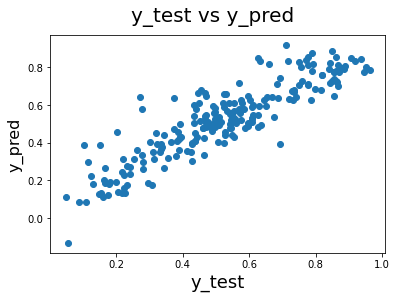

In [99]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [100]:
round(LR7.params,4)

const             0.1259
Year              0.2329
holiday          -0.0987
temp              0.5480
windspeed        -0.1532
summer            0.0881
winter            0.1293
Light_snowrain   -0.2829
Misty            -0.0784
Sep               0.1012
dtype: float64

Final model equation
cnt = 0.1259 + (Year * 0.2329) -(holiday * 0.0987) + (temp * 0.5480) − (windspeed * 0.1532) + (summer * 0.0881) + (winter × 0.1293) - (Light_snowrain × 0.2829) - (Misty × 0.0784) + (Sep * 0.1012)

In [102]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7854


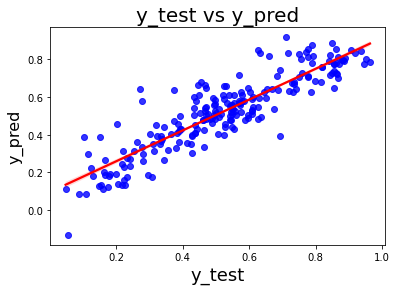

In [103]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.830
- Test dataset R^2           : 0.7942
- Train dataset Adjusted R^2 : 0.827   
- Test dataset Adjusted R^2  : 0.7854

On analysing data, it was observed that, the linear regression model was able to predict bike demand precisely with an R2 Score of more than 80%

Analysing the above model, the comapany should focus on the following features:
Company should focus on expanding business during Spring.
Company should focus on expanding business during September.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

Conclusion : 
Below are the variables which are significant in predicting the demand for shared bikes. Demand of bikes depends on 
1) temp

2) windspeed

3) Year

4) summer

5) Misty

6) winter

7) Sep

8) Light_snowrain

9) holiday